In [2]:
%matplotlib inline
from ADTLib import ADT
import numpy, scipy, matplotlib.pyplot as plt, librosa, IPython.display as ipd
import stanford_mir; stanford_mir.init()

/Users/stjoa/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/stjoa/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[&larr; Back to Index](index.html)

# Drum Transcription using ADTLib

This notebook requires `ADTLib`. See [ADTLib repo](https://github.com/CarlSouthall/ADTLib) for installation instructions. If you experience problems, be sure to install the latest versions of `tensorflow` and `dask`.

Load the audio file into an array:

In [3]:
filename = 'audio/classic_rock_beat.mp3'
x, sr = librosa.load(filename)

Listen to the signal:

In [4]:
ipd.Audio(x, rate=sr)

## ADTLib

Use ADTLib to identify the location and types of each onset:

In [5]:
drum_onsets = ADT([filename])[0]

INFO:tensorflow:Restoring parameters from /Users/stjoa/anaconda3/lib/python3.6/site-packages/ADTLib/files/KickADTLibAll
INFO:tensorflow:Restoring parameters from /Users/stjoa/anaconda3/lib/python3.6/site-packages/ADTLib/files/SnareADTLibAll
INFO:tensorflow:Restoring parameters from /Users/stjoa/anaconda3/lib/python3.6/site-packages/ADTLib/files/HihatADTLibAll


In [6]:
drum_onsets

{'Hihat': array([0.42956916, 0.65015873, 0.85913832, 1.07972789, 1.28870748,
        1.50929705, 1.71827664, 1.93886621, 2.1478458 , 2.36843537,
        2.57741497, 2.78639456, 3.00698413, 3.21596372, 3.42494331,
        3.64553288, 3.86612245, 4.07510204, 4.28408163, 4.5046712 ,
        4.72526077, 4.93424036, 5.15482993, 5.36380952, 5.57278912,
        5.79337868, 6.00235828, 6.21133787, 6.43192744, 6.64090703]),
 'Kick': array([1.49768707, 1.92725624, 2.1478458 , 2.78639456, 3.21596372,
        3.42494331, 4.07510204, 4.93424036, 5.57278912, 5.78176871,
        6.21133787, 6.64090703]),
 'Snare': array([0.85913832, 2.57741497, 4.28408163, 6.43192744])}

ADT also produces the file `classic_rock_beat_drumtab.pdf` which looks like this:

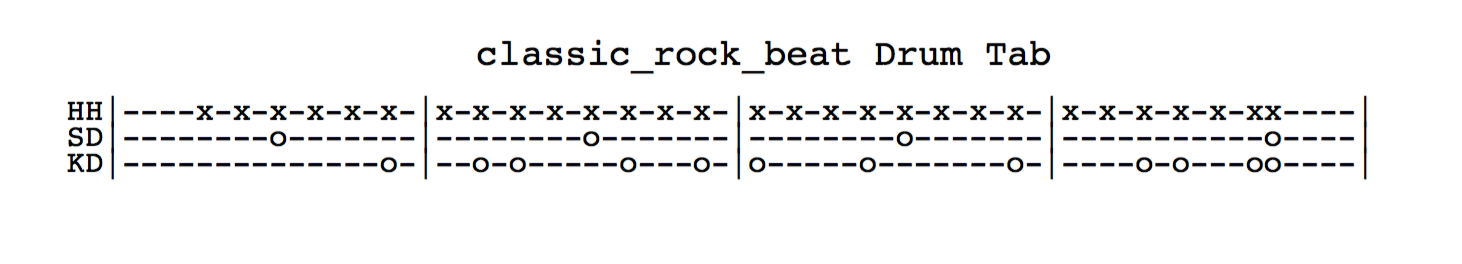

In [7]:
ipd.Image('img/classic_rock_beat_drumtab.png')

## Listen to onsets

For each type of drum, create a click track from the onsets, and listen to it with the original signal.

Bass/kick drum:

In [8]:
clicks = librosa.clicks(times=drum_onsets['Kick'], sr=sr, length=len(x))
ipd.Audio(x + clicks, rate=sr)

Snare drum:

In [9]:
clicks = librosa.clicks(times=drum_onsets['Snare'], sr=sr, length=len(x))
ipd.Audio(x + clicks, rate=sr)

Hi-hat:

In [10]:
clicks = librosa.clicks(times=drum_onsets['Hihat'], sr=sr, length=len(x))
ipd.Audio(x + clicks, rate=sr)

## Visualize spectrum

For each drum type, let's compute an average drum beat from the original signal and visualize the spectrum for that average drum beat.

Create a function that returns a log-amplitude spectrum of an average drum beat for a particular drum type:

In [11]:
def plot_avg_spectrum(x, onset_times):
    
    # Compute average drum beat signal.
    frame_sz = int(0.100*sr)
    def normalize(z): 
        return z/scipy.linalg.norm(z)
    onset_samples = librosa.time_to_samples(onset_times, sr=sr)
    x_avg = numpy.mean([normalize(x[i:i+frame_sz]) for i in onset_samples], axis=0)
    
    # Compute average spectrum.
    X = librosa.spectrum.fft.fft(x_avg)
    Xmag = librosa.amplitude_to_db(abs(X))
    
    # Plot spectrum.
    f = numpy.arange(frame_sz)*sr/frame_sz
    Nd2 = int(frame_sz/2)
    plt.figure(figsize=(14, 5))
    plt.plot(f[:Nd2], Xmag[:Nd2])
    plt.xlim(xmax=f[Nd2])
    plt.ylim([-50, 20])
    plt.xlabel('Frequency (Hertz)')

Plot the spectrum for an average bass drum:

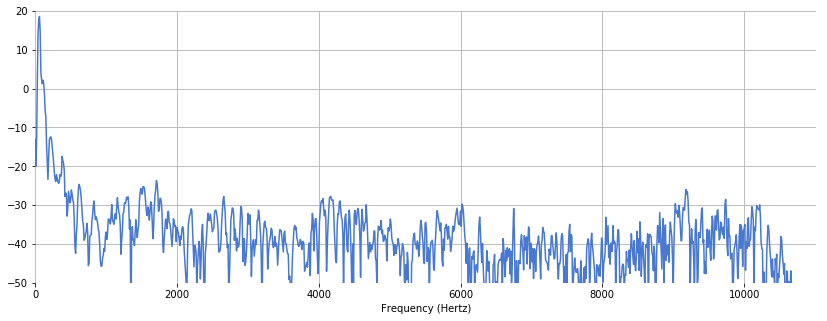

In [12]:
plot_avg_spectrum(x, drum_onsets['Kick'])

Snare drum:

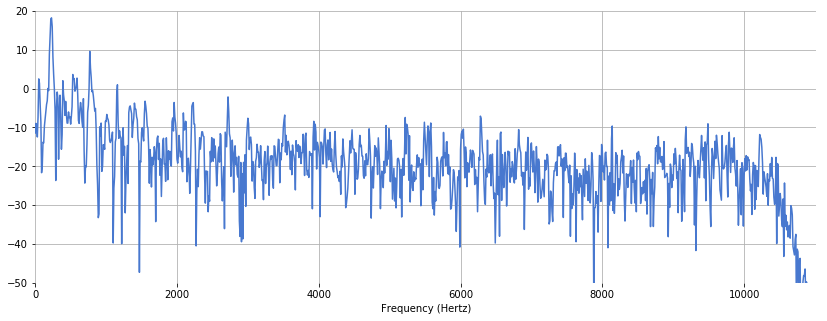

In [13]:
plot_avg_spectrum(x, drum_onsets['Snare'])

Hi-hat:

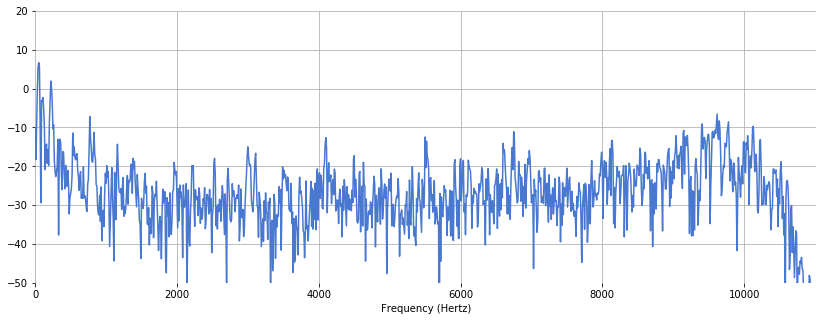

In [14]:
plot_avg_spectrum(x, drum_onsets['Hihat'])

[&larr; Back to Index](index.html)